In [1]:
import numpy as np
arr_a = np.random.rand(3, 3)
arr_b = np.random.rand(3, 3)

print(arr_a)
print(arr_b, '\n')

arr_b[0, :] = arr_a[0, :]

print(arr_a)
print(arr_b, '\n')

arr_a[0, :] = 0

print(arr_a)
print(arr_b)


[[0.60279731 0.7362276  0.78471019]
 [0.11368119 0.95440759 0.46551374]
 [0.09399799 0.6095776  0.561927  ]]
[[0.36442892 0.87468795 0.78900394]
 [0.59431164 0.03978854 0.30245092]
 [0.39522684 0.16941536 0.07477213]] 

[[0.60279731 0.7362276  0.78471019]
 [0.11368119 0.95440759 0.46551374]
 [0.09399799 0.6095776  0.561927  ]]
[[0.60279731 0.7362276  0.78471019]
 [0.59431164 0.03978854 0.30245092]
 [0.39522684 0.16941536 0.07477213]] 

[[0.         0.         0.        ]
 [0.11368119 0.95440759 0.46551374]
 [0.09399799 0.6095776  0.561927  ]]
[[0.60279731 0.7362276  0.78471019]
 [0.59431164 0.03978854 0.30245092]
 [0.39522684 0.16941536 0.07477213]]


In [3]:
def lorenz_system(t: np.ndarray, initial_state: tuple) -> list:
    """Takes list of times and tuple with initial conditions and returns a list.
    
    This function is defined so to be used in the SciPy solve_ivp solver. It
    accepts a list of times to be evaluated at and a tuple of initial states
    which is necessary for solve_ivp. Sigma, rho, and beta are parameters
    that define the behavior of the system and are kept constant. The function
    returns a list of values for each ODE for x, y, and z. 
    """


    sigma = 10
    rho = 28
    beta = 8/3
    x, y, z = initial_state

    dx = sigma*(y-x)
    dy = x*(rho-z) - y
    dz = x*y - beta*z

    return [dx, dy, dz]

In [4]:
def integration_time(config, mode: str) -> tuple[tuple, np.ndarray]: 
    """Takes config file/mode & returns the time span & list of time steps.
    
    This function takes the configuration file and mode as input. Mode can be:
    t_train, t_test, or t_val. Mode is used to create t_span which contains the 
    initial and final time of the simulation. The function returns t_span and 
    t which is a 1D numpy array of time values starting at t_span[0] and ending
    at t_span[1] each separated by size dt. 
    """

    dt = config["dt"]  # Time step size of simulation from config file
    t_span = (0, config[mode])  # Initial and final times
    t = np.arange(t_span[0], t_span[1], dt)  # 1D array of times 
    return t_span, t


def initial_state_generator() -> tuple:
    """Generates and returns random integer initial values for x, y, and z."""

    x0 = np.random.randint(-20, 20)  # Sample from integer space -20 < x < 20
    y0 = np.random.randint(-20, 20)
    z0 = np.random.randint(-20, 20)
    f0 = (x0, y0, z0)
    return f0

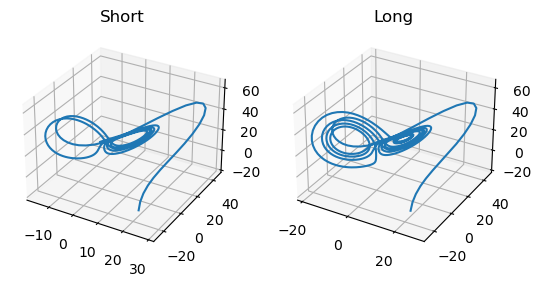

In [11]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

config = {"mode1": 5.12, "mode2": 10.28, "dt": 0.01}
t_span1, t1 = integration_time(config, "mode1")
t_span2, t2 = integration_time(config, "mode2")
f0 = initial_state_generator()

soln1 = solve_ivp(lorenz_system, t_span1, f0, t_eval=t1)  #solve Lorenz
soln2 = solve_ivp(lorenz_system, t_span2, f0, t_eval=t2)  #solve Lorenz

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot(soln1.y[0, :],
        soln1.y[1, :],
        soln1.y[2, :])
ax.set_title("Short")

ax = fig.add_subplot(1, 2, 2, projection='3d')

ax.plot(soln2.y[0, :],
        soln2.y[1, :],
        soln2.y[2, :])
ax.set_title("Long")
plt.show()

In [ ]:
from packages.utils.funciton_library import load_config

CONFIG_PATH = "packages/configs/test1.yaml"
config = load_config(CONFIG_PATH)

In [31]:
import torch
T = 3
d_model = 6

import numpy as np

def positional_encoding(self, x):
    pos = torch.arange(self.T)[:, None]
    i = torch.arange(self.d_model)[None, :]
    angle_rates = 1 / torch.pow(10000, (2 * (i // 2)) / float(self.d_model))
    pe = pos * angle_rates
    pe[:, 0::2] = torch.sin(pe[:, 0::2])
    pe[:, 1::2] = torch.cos(pe[:, 1::2])
    
    return pe+x


In [32]:
positional_encoding(T, d_model)

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000]])

In [2]:
import torch
import torch.nn as nn

# Define the vocabulary and embedding dimension
vocab = ["<pad>", "<unk>", "the", "cat", "in", "hat"]
embedding_dim = 4

# Create a dictionary to map words to indices
word2idx = {word: i for i, word in enumerate(vocab)}
print(word2idx)

# Create the embedding layer
embedding = nn.Embedding(len(vocab), embedding_dim, padding_idx=word2idx["<pad>"])

# Define the input sequence
input_seq = ["the", "cat", "in", "the", "hat"]

# Convert the input sequence to a tensor of word indices
input_tensor = torch.LongTensor([word2idx.get(word, word2idx["<unk>"]) for word in input_seq])

# Pass the input tensor through the embedding layer
embedded_tensor = embedding(input_tensor)

# Print the output
print(embedded_tensor)

{'<pad>': 0, '<unk>': 1, 'the': 2, 'cat': 3, 'in': 4, 'hat': 5}
tensor([[ 1.7149,  0.0352,  1.6315, -0.8331],
        [-0.3588, -2.1257, -0.2933,  0.1152],
        [ 0.0653, -0.4310,  1.5881, -0.5492],
        [ 1.7149,  0.0352,  1.6315, -0.8331],
        [ 1.1381,  0.1102, -0.0261, -0.9164]], grad_fn=<EmbeddingBackward0>)
